# Introduction to Data Science (UZOP) - Project - Part 1

You will solve this project assignment using the dataset provided by the assistant you registered with. This exercise carries a total of 10 points. In case of any questions or ambiguities, please contact your assigned assistant.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Load the given CSV file and display the first 8 rows of the dataset. (0.5 points)

In [2]:
df_attrition = pd.read_csv("data/attrition.csv")
df_attrition[0:8]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,NumCompaniesWorked,Over18,OverTime,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,NaN,1102,Sales,1.0,2,Life Sciences,1,1,...,8,Y,Yes,3,8,0,6,4,0,5
1,49.0,No,NaN,279,Research & Development,8.0,1,Life Sciences,1,2,...,1,Y,No,4,10,3,10,7,1,7
2,37.0,Yes,NaN,1373,Research & Development,2.0,2,Other,1,4,...,6,Y,Yes,3,7,3,0,0,0,0
3,33.0,No,NaN,1392,Research & Development,3.0,4,Life Sciences,1,5,...,1,Y,Yes,3,8,3,8,7,3,0
4,27.0,No,NaN,591,Research & Development,2.0,1,Medical,1,7,...,9,Y,No,3,6,3,2,2,2,2
5,32.0,No,NaN,1005,Research & Development,2.0,2,Life Sciences,1,8,...,0,Y,No,3,8,2,7,7,3,6
6,59.0,No,Travel_Rarely,1324,Research & Development,3.0,3,Medical,1,10,...,4,Y,Yes,4,12,3,1,0,0,0
7,30.0,No,NaN,1358,Research & Development,24.0,1,Life Sciences,1,11,...,1,Y,No,4,1,2,1,0,0,0


2. Find monotonic and constant features and remove them. (1 point)

In [3]:
nrows = df_attrition["Age"].size
keys_const = df_attrition.columns[df_attrition.nunique() <= 1] # constant because only one value exist
keys_monoton = df_attrition.columns[df_attrition.nunique() == nrows] # monoton because every value is different
print("Constant features: " + str(list(keys_const)))
print("Monoton features: " + str(list(keys_monoton)))

# remove constant and monoton features
df_attrition.drop(keys_monoton, axis=1, inplace=True)
df_attrition.drop(keys_const, axis=1, inplace=True)



Constant features: ['EmployeeCount', 'Over18']
Monoton features: ['EmployeeNumber']


3. Find missing values. Perform imputation/removal of missing values using an appropriate method. Explain why you applied the chosen methods. (2 points)

In [4]:
l_col_na = list(df_attrition.columns[df_attrition.isna().sum() > 0])
print("Columns with missing values: " + str(l_col_na))
for col in l_col_na:
    print("Amount missing values, " + col + ": " + str(df_attrition[col].isna().sum()))
    
# In general there are some methods for dealing with missing data, as example, removing the measurements, removing the feature, interpolate the data or fill missing data with mean or median values of the feature, or getting the data from other datasets
# For Age and DistanceFromHome, i remove the measurements with missing data from the dataset, because 73 of 1470 measurements is only 5% and i assume that there is no certain reason for the absence of the data, so no other information is lost. 
# Interpolation makes no sense here
# Filling the missing values with mean or median value is here also a valid method.

df_attrition = df_attrition[df_attrition.Age.isna() == False]
df_attrition = df_attrition[df_attrition.DistanceFromHome.isna() == False]

# For BusinessTravel interpolation and median/mean value makes no sense because its not numerical.
# Dropping measurements is not an option because 1323 of 1470 is almost the whole dataset, thats why i drop the feature.
df_attrition.drop("BusinessTravel", axis=1, inplace=True)

Columns with missing values: ['Age', 'BusinessTravel', 'DistanceFromHome']
Amount missing values, Age: 73
Amount missing values, BusinessTravel: 1323
Amount missing values, DistanceFromHome: 73


4. Transform categorical features into numerical ones. (1 point)

In [5]:
# create list with names of categorical features
list_categorical = list()
for col in df_attrition.columns:
    if df_attrition[col].dtypes == 'object':
        list_categorical.append(col)
print("Categorical features: " + str(list_categorical))
# copy dataframe because the next task needs categorical features
df_attrition_cat2num = df_attrition.copy()
for col in list_categorical:
    df_attrition_cat2num[col] = pd.factorize(df_attrition[col])[0]

Categorical features: ['Attrition', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime']


5. For numerical features, display the mean, median, minimum, and maximum values. For categorical features, print the frequency of each value. (1.5 points)

In [6]:
# print data for every feature, depending on if its categorical or not
for col in df_attrition.columns:
    print("Column: " + col)
    if col in list_categorical:
        count_per_title = df_attrition.groupby(col).count().loc[:,'Age'].values
        title_name = df_attrition.groupby(col).count().index.values
        for i in range(len(count_per_title)):
            print("   " + title_name[i] + ": " + str(count_per_title[i]))
    else:
        print("   mean: " + str(df_attrition[col].mean()))
        print("   median: " + str(df_attrition[col].median()))
        print("   min: " + str(df_attrition[col].min()))
        print("   max: " + str(df_attrition[col].max()))

Column: Age
   mean: 37.04151753758053
   median: 36.0
   min: 18.0
   max: 60.0
Column: Attrition
   No: 1171
   Yes: 226
Column: DailyRate
   mean: 801.1274158911954
   median: 799.0
   min: 102
   max: 1499
Column: Department
   Human Resources: 60
   Research & Development: 917
   Sales: 420
Column: DistanceFromHome
   mean: 9.271295633500358
   median: 7.0
   min: 1.0
   max: 29.0
Column: Education
   mean: 2.9205440229062276
   median: 3.0
   min: 1
   max: 5
Column: EducationField
   Human Resources: 25
   Life Sciences: 581
   Marketing: 149
   Medical: 445
   Other: 77
   Technical Degree: 120
Column: EnvironmentSatisfaction
   mean: 2.7251252684323553
   median: 3.0
   min: 1
   max: 4
Column: Gender
   Female: 557
   Male: 840
Column: HourlyRate
   mean: 65.92555476020043
   median: 66.0
   min: 30
   max: 100
Column: JobSatisfaction
   mean: 2.7258410880458124
   median: 3.0
   min: 1
   max: 4
Column: MaritalStatus
   Divorced: 312
   Married: 643
   Single: 442
Column: Mo

6. Normalize the numerical features. (1 bod)

In [7]:
# create new normalized dataframe
df_attrition_norm = df_attrition.copy()
# for all non-categorical columns
for col in df_attrition.columns:
    if col not in list_categorical:
        # transformation into values between 0 and 1, no negative values exist here.
        df_attrition_norm[col] = df_attrition[col].astype("float64")
        df_attrition_norm[col] = df_attrition[col] / df_attrition[col].max()

7. Create a composite plot with 4 subplots (2 rows and 2 columns). Add titles to the subplots and label the axes on each of them. Visualize the following: (3 points)
  - Histogram of an arbitrary categorical feature
  - Pie chart of the target variable
  - Box plot of an arbitrary numerical feature
  - Scatter plot of two arbitrary numerical features. Color the samples based on the value of the target variable.

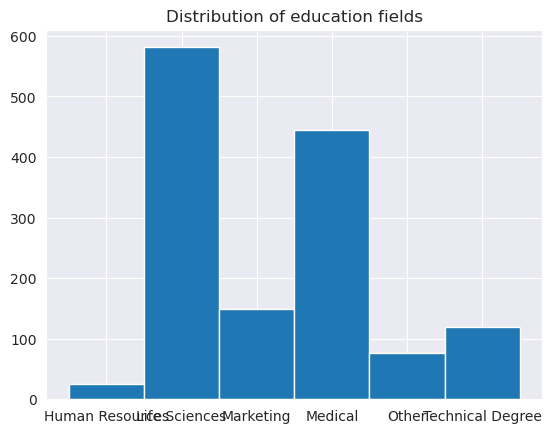

In [8]:
#   - Histogram of education field
col_name = "EducationField"
# get title names and amount of people
count_per_title = df_attrition.groupby(col_name).count().loc[:,'Age'].values
title_name = df_attrition.groupby(col_name).count().index.values
# make bar plot (fancier than hist plot for this application)
plt.bar(title_name, count_per_title, width=1)
plt.title("Distribution of education fields")
plt.show()


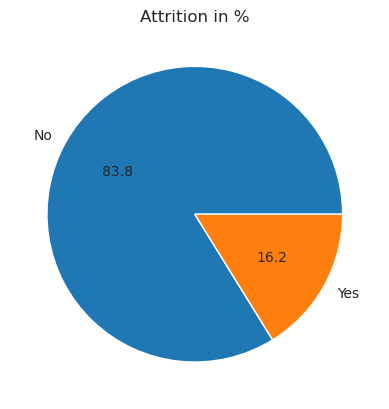

In [9]:
#   - Pie chart of the target variable: attrition
col_name = "Attrition"
count_per_title = df_attrition.groupby(col_name).count().loc[:,'Age'].values
title_name = df_attrition.groupby(col_name).count().index.values

plt.pie(count_per_title, labels=title_name, autopct='%.1f')
plt.title("Attrition in %")
plt.show()

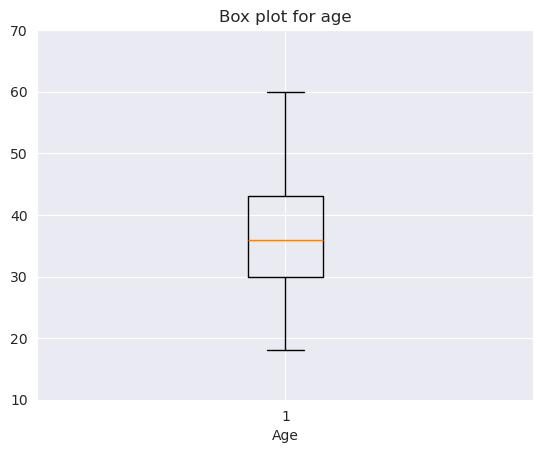

In [10]:
# Boxplot of DailyRate
plt.boxplot(df_attrition.Age)
plt.title('Box plot for age')
plt.xlabel("Age")
plt.ylim([10,70])
plt.show()

Text(0.5, 0, 'DailyRate')

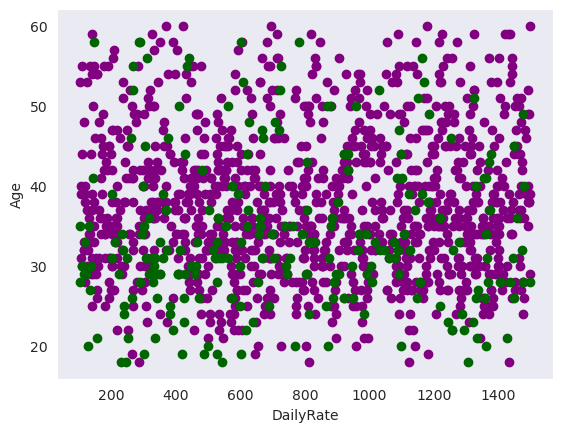

In [11]:
# - Scatter plot of age and dailyRate features. Color the samples based on the value of the target variable.

mask_attrition = df_attrition.Attrition == "Yes"
# scatter plot with different colers
plt.scatter(df_attrition.DailyRate[~mask_attrition], df_attrition.Age[~mask_attrition], color="purple")
plt.scatter(df_attrition.DailyRate[mask_attrition], df_attrition.Age[mask_attrition], color="darkgreen")

# enable grid and name the axes
plt.grid()
plt.ylabel('Age')
plt.xlabel('DailyRate')

